In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [78]:
a_0 = -0.3
a_1 = 0.5
size = 50
sample_size = 20
x = np.random.uniform(-1, 1, sample_size)
syn_data = a_0 + a_1*x
syn_data += np.random.normal(0, 0.2, sample_size)


In [79]:

w0_grid = np.linspace(-1, 1, size)
# need to flip order of w1_grid because the plotter goes from top to bottom
# if w1 was from -1 to 1, the graph would show a positive value for w0
w1_grid = np.linspace(1, -1, size)
prior = np.zeros((size, size))
likelihood = np.zeros((size, size))
posterior_unstandardized = np.zeros((size, size))
posterior = np.zeros((size, size))

In [80]:
w0_var = 0.25
w1_var = 0.25
for i in range(size):
    for j in range(size):
        p_w0 = (1/(w0_var*np.sqrt(2*np.pi)))*np.exp(-(w0_grid[j] - 0)**2/(2*w0_var**2))
        p_w1 = (1/(w1_var*np.sqrt(2*np.pi)))*np.exp(-(w1_grid[i] - 0)**2/(2*w1_var**2))
        prior[i, j] = p_w0*p_w1
prior /= np.sum(prior)
history = []
history.append([prior.copy(), posterior.copy(), likelihood.copy()])

In [81]:
pts = []
for k in range(sample_size):
    for i in range(size):
        for j in range(size):
            likelihood[i, j] = (1/(0.2*np.sqrt(2*np.pi)))*np.exp(-((syn_data[k] - w0_grid[j] - w1_grid[i]*x[k])**2)/(2*(0.2**2)))
    posterior_unstandardized = likelihood * prior
    posterior = posterior_unstandardized / (np.sum(posterior_unstandardized))
    history.append([prior.copy(), posterior.copy(), likelihood.copy()])

    prior = posterior


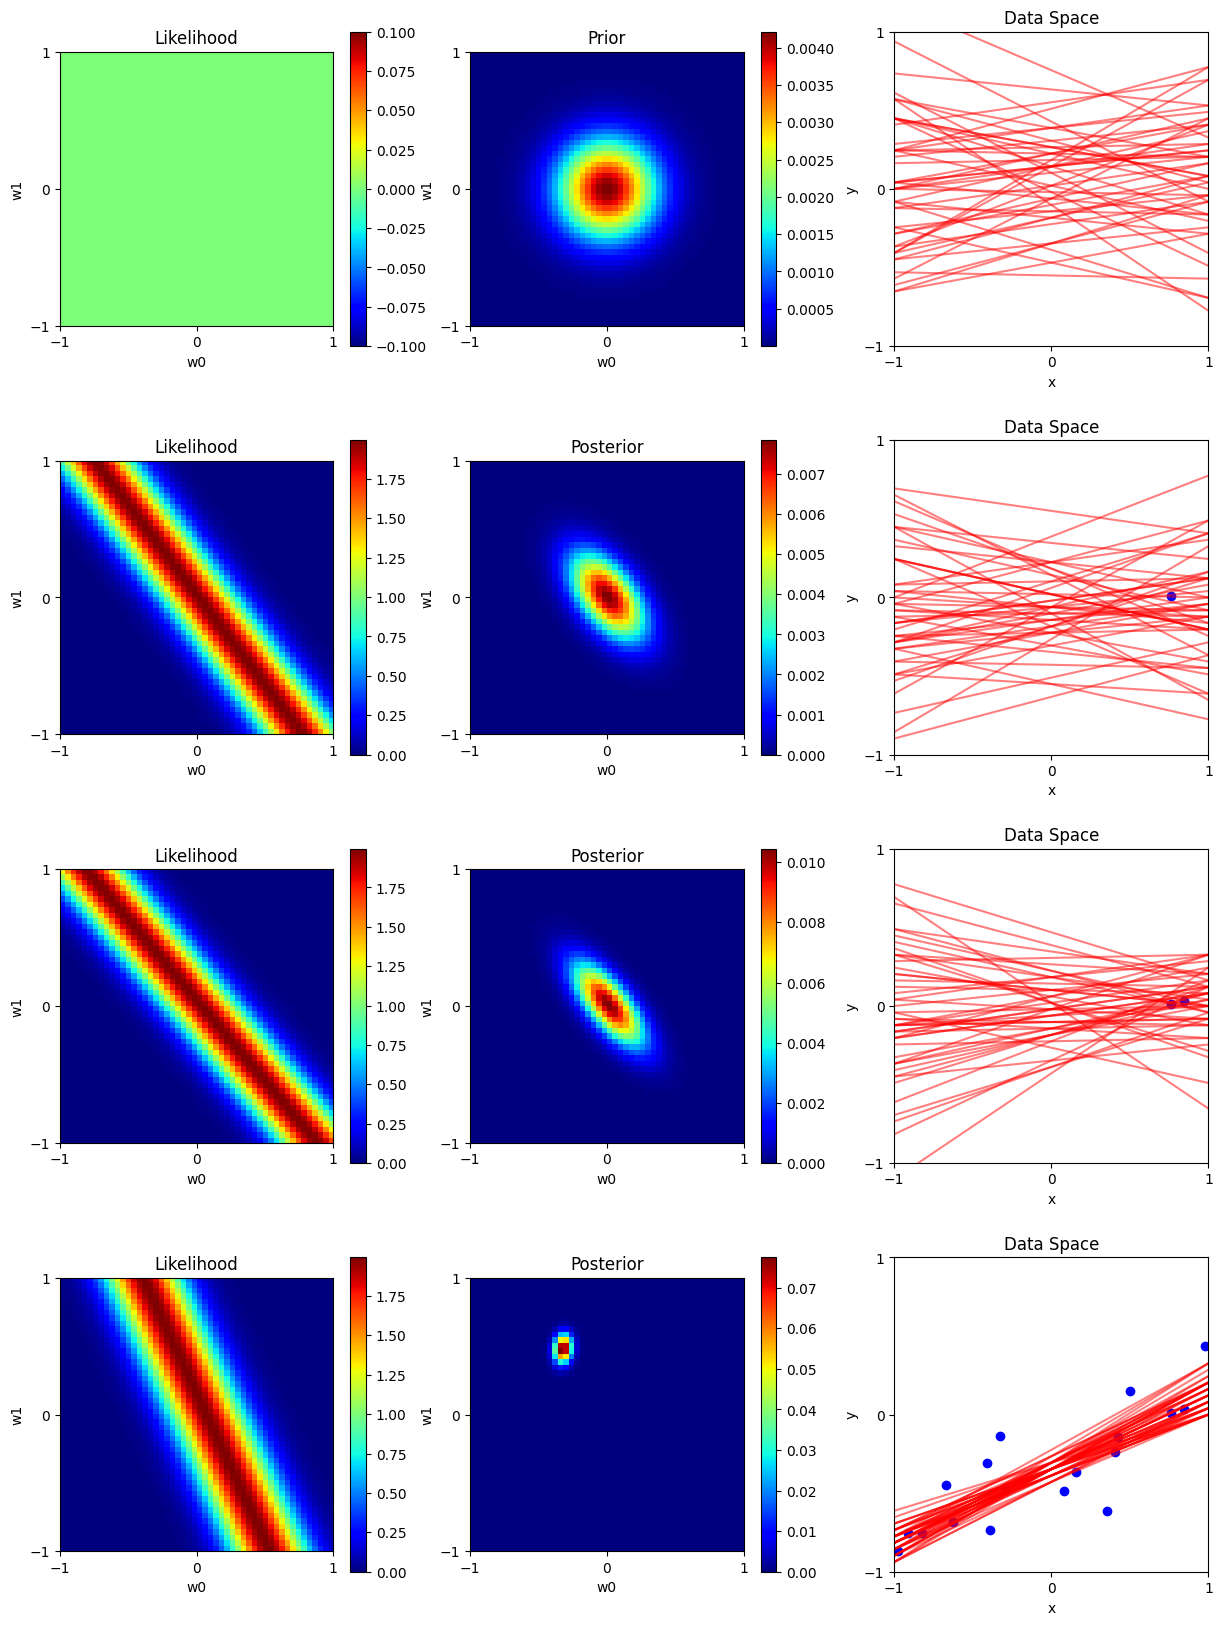

In [82]:
interval = 5
view = np.array([0, 1, 2, -1])
# fig, axs = plt.subplots(int(sample_size/interval) + 1, 3, figsize=(20, 25))
fig, axs = plt.subplots(len(view), 3, figsize=(15, 20))

for k in range(len(view)):
    # if k % interval == 0 or k == sample_size:
    index = view[k]
    prior_t = history[index][0]
    posterior_t = history[index][1]
    likelihood_t = history[index][2]
    # index = int(k/interval)
    # if k == sample_size:
        # index = int(k/interval)
    likelihood_plot = axs[k, 0].imshow(likelihood_t, extent=(-1, 1, -1, 1), cmap='jet', aspect='equal')
    axs[k, 0].set_xlabel("w0")
    axs[k, 0].set_ylabel("w1")
    axs[k, 0].set_title("Likelihood")
    axs[k, 0].xaxis.set_major_locator(MultipleLocator(1.0))
    axs[k, 0].yaxis.set_major_locator(MultipleLocator(1.0))
    if index == 0:
        prior_posterior_plot = axs[k, 1].imshow(prior_t, extent=(-1, 1, -1, 1), cmap='jet', aspect='equal')
        axs[k, 1].set_title("Prior")
    else:
        prior_posterior_plot = axs[k, 1].imshow(posterior_t, extent=(-1, 1, -1, 1), cmap='jet', aspect='equal')
        axs[k, 1].set_title("Posterior")
    axs[k, 1].set_xlabel("w0")
    axs[k, 1].set_ylabel("w1")
    axs[k, 1].xaxis.set_major_locator(MultipleLocator(1.0))
    axs[k, 1].yaxis.set_major_locator(MultipleLocator(1.0))
    
    prior_flat = prior_t.flatten()
    sample_indices = np.random.choice(len(prior_flat), size=size, p=prior_flat)
    for i in range(size):
        axs[k, 2].plot(np.linspace(-1, 1, size), w1_grid[int(np.floor(sample_indices[i] / size))]*np.linspace(-1, 1, size) + w0_grid[sample_indices[i] % size], color = 'r', alpha=0.5)
    data_space_plot = axs[k, 2].scatter(x[0:index], syn_data[0:index], marker='o', color='b')
    axs[k, 2].set_xlabel("x")
    axs[k, 2].set_ylabel("y")
    axs[k, 2].set_title("Data Space")
    axs[k, 2].set_xlim([-1, 1])
    axs[k, 2].set_ylim([-1, 1])
    axs[k, 2].xaxis.set_major_locator(MultipleLocator(1.0))
    axs[k, 2].yaxis.set_major_locator(MultipleLocator(1.0))
    axs[k, 2].set_aspect('equal')


    fig.colorbar(likelihood_plot, ax=axs[index, 0], orientation='vertical')
    fig.colorbar(prior_posterior_plot, ax=axs[index, 1], orientation='vertical')

# plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)

In [85]:
print(np.max(posterior))
print(int(np.floor(np.argmax(posterior)/50)), np.argmax(posterior) % 50)
print(w1_grid[int(np.floor(np.argmax(posterior)/50))], w0_grid[np.argmax(posterior) % 50])
print(np.max(posterior))
# print(posterior)
# # plot the data
# fig, ax = plt.subplots()
# sns.heatmap(posterior, cmap='viridis', ax=ax, annot=True, cbar=False)

0.0774855925108784
13 16
0.4693877551020409 -0.34693877551020413
0.0774855925108784
